In [1]:
#import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import missingno as msno
import matplotlib.ticker as tk
%matplotlib inline
import numpy as np
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage  
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #never use tthis linear regression in scikit learn
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error

In [2]:
#Step 1: Read the dataset
salesTrain=pd.read_csv("Train.csv")


In [55]:
salesTest=pd.read_csv("Test.csv")

In [56]:
salesTrain.isnull().sum()

Item_Weight                      0
Item_Visibility                  0
Item_Type                        0
Item_MRP                         0
Store Age                        0
Item_Outlet_Sales                0
Item_Fat_Content_Low Fat         0
Item_Fat_Content_Regular         0
Item_Fat_Content_low fat         0
Outlet_Identifier_OUT010         0
Outlet_Identifier_OUT013         0
Outlet_Identifier_OUT017         0
Outlet_Identifier_OUT018         0
Outlet_Identifier_OUT019         0
Outlet_Identifier_OUT027         0
Outlet_Identifier_OUT035         0
Outlet_Identifier_OUT045         0
Outlet_Identifier_OUT046         0
Outlet_Identifier_OUT049         0
Outlet_Size_High                 0
Outlet_Size_Medium               0
Outlet_Size_Small                0
Outlet_Location_Type_Tier 1      0
Outlet_Location_Type_Tier 2      0
Outlet_Location_Type_Tier 3      0
Outlet_Type_Grocery Store        0
Outlet_Type_Supermarket Type1    0
Outlet_Type_Supermarket Type2    0
Outlet_Type_Supermar

In [57]:
salesTest.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Store Age                    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [58]:
salesTrain.nunique()

Item_Weight                       415
Item_Visibility                  7876
Item_Type                          16
Item_MRP                         5936
Store Age                           9
Item_Outlet_Sales                3493
Item_Fat_Content_Low Fat            2
Item_Fat_Content_Regular            2
Item_Fat_Content_low fat            2
Outlet_Identifier_OUT010            2
Outlet_Identifier_OUT013            2
Outlet_Identifier_OUT017            2
Outlet_Identifier_OUT018            2
Outlet_Identifier_OUT019            2
Outlet_Identifier_OUT027            2
Outlet_Identifier_OUT035            2
Outlet_Identifier_OUT045            2
Outlet_Identifier_OUT046            2
Outlet_Identifier_OUT049            2
Outlet_Size_High                    2
Outlet_Size_Medium                  2
Outlet_Size_Small                   2
Outlet_Location_Type_Tier 1         2
Outlet_Location_Type_Tier 2         2
Outlet_Location_Type_Tier 3         2
Outlet_Type_Grocery Store           2
Outlet_Type_

In [6]:
salesTest.nunique()

Item_Identifier              1527
Item_Weight                   410
Item_Fat_Content                3
Item_Visibility              5258
Item_Type                      16
Item_MRP                     4390
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [7]:
salesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Store Age                  8519 non-null   int64  
 9   Outlet_Size                8519 non-null   object 
 10  Outlet_Location_Type       8519 non-null   object 
 11  Outlet_Type                8519 non-null   object 
 12  Item_Outlet_Sales          8519 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [8]:
label_encoder = preprocessing.LabelEncoder()
salesTrain['Item_Type']= label_encoder.fit_transform(salesTrain['Item_Type'])
salesTrain['Item_Type'].value_counts()

6     1232
13    1199
9      910
5      855
4      681
3      649
0      647
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [59]:
label_encoder = preprocessing.LabelEncoder()
salesTest['Item_Type']= label_encoder.fit_transform(salesTest['Item_Type'])
salesTest['Item_Type'].value_counts()

13    780
6     777
9     637
5     567
4     454
0     438
3     433
8     338
10    311
14    281
1     165
7     147
15    121
11    111
2      76
12     25
Name: Item_Type, dtype: int64

In [10]:
salesTrain= pd.get_dummies(data=salesTrain, columns=['Item_Fat_Content'])
salesTrain= pd.get_dummies(data=salesTrain, columns=['Outlet_Identifier'])
salesTrain= pd.get_dummies(data=salesTrain, columns=['Outlet_Size'])
salesTrain= pd.get_dummies(data=salesTrain, columns=['Outlet_Location_Type'])
salesTrain= pd.get_dummies(data=salesTrain, columns=['Outlet_Type'])

In [60]:
salesTest= pd.get_dummies(data=salesTest, columns=['Item_Fat_Content'])
salesTest= pd.get_dummies(data=salesTest, columns=['Outlet_Identifier'])
salesTest= pd.get_dummies(data=salesTest, columns=['Outlet_Size'])
salesTest= pd.get_dummies(data=salesTest, columns=['Outlet_Location_Type'])
salesTest= pd.get_dummies(data=salesTest, columns=['Outlet_Type'])

In [12]:
salesTrain=salesTrain.drop(['Outlet_Establishment_Year'],axis=1)

In [61]:
salesTest=salesTest.drop(['Outlet_Establishment_Year'],axis=1)

In [14]:
salesTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Identifier                8519 non-null   object 
 1   Item_Weight                    8519 non-null   float64
 2   Item_Visibility                8519 non-null   float64
 3   Item_Type                      8519 non-null   int32  
 4   Item_MRP                       8519 non-null   float64
 5   Store Age                      8519 non-null   int64  
 6   Item_Outlet_Sales              8519 non-null   float64
 7   Item_Fat_Content_Low Fat       8519 non-null   uint8  
 8   Item_Fat_Content_Regular       8519 non-null   uint8  
 9   Item_Fat_Content_low fat       8519 non-null   uint8  
 10  Outlet_Identifier_OUT010       8519 non-null   uint8  
 11  Outlet_Identifier_OUT013       8519 non-null   uint8  
 12  Outlet_Identifier_OUT017       8519 non-null   u

<AxesSubplot:>

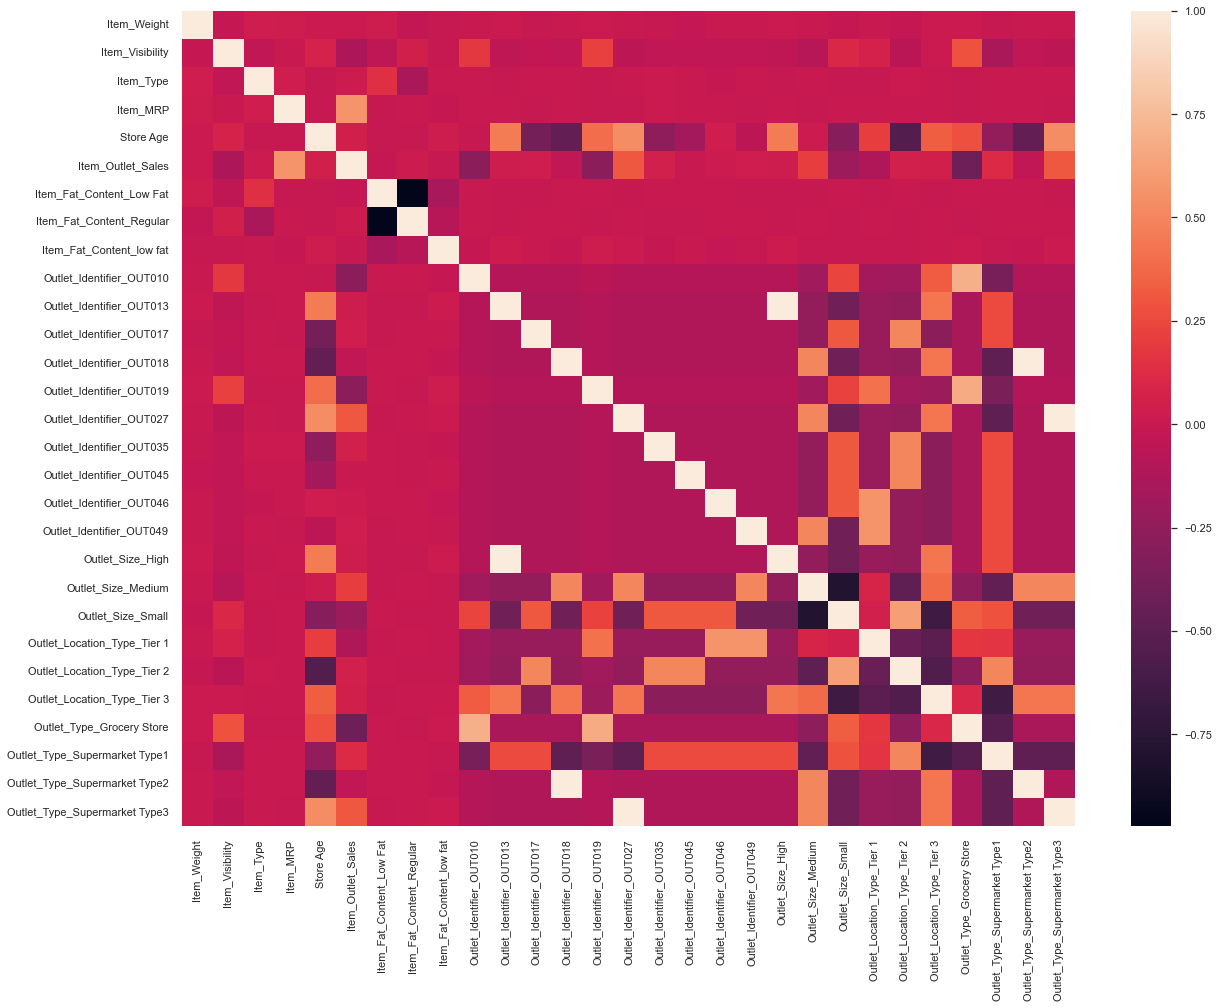

In [15]:
sns.set(rc = {'figure.figsize':(20,15)})
sns.heatmap(salesTrain.corr())

<AxesSubplot:>

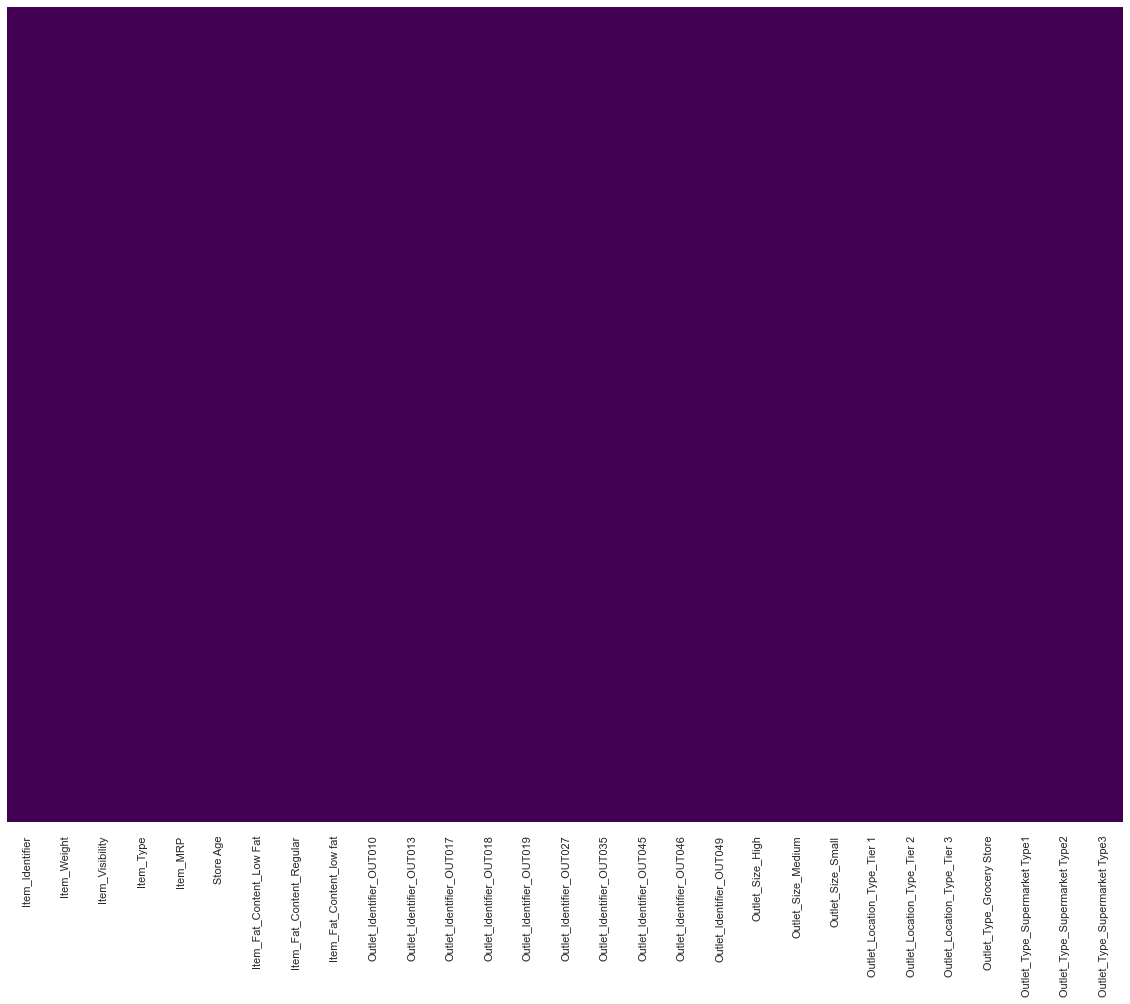

In [62]:
sns.heatmap(salesTest.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [18]:
salesTrain.corr()

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Store Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Outlet_Identifier_OUT010,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000,-0.009173,0.035700,0.025975,0.013426,0.013168,0.028204,-0.026798,-0.006854,0.002144,...,0.009862,0.004967,-0.010906,0.005709,-0.016020,0.010137,0.006931,-0.007679,-0.000156,0.004460
Item_Visibility,-0.009173,1.000000,-0.034816,-0.001155,0.074325,-0.128297,-0.046097,0.046902,-0.001817,0.180887,...,-0.041824,-0.081070,0.103026,0.060991,-0.068561,0.009768,0.285947,-0.143856,-0.034555,-0.051416
Item_Type,0.035700,-0.034816,1.000000,0.032526,-0.004679,0.016646,0.137904,-0.138932,-0.000362,0.000423,...,-0.003576,0.004831,-0.002321,-0.006211,0.007041,-0.001051,-0.002860,0.000955,-0.000726,0.002321
Item_MRP,0.025975,-0.001155,0.032526,1.000000,-0.004599,0.567803,-0.003484,0.006358,-0.011937,-0.000985,...,0.002341,-0.004195,0.002496,-0.001319,0.001759,-0.000476,-0.004273,0.004507,0.003754,-0.006054
Store Age,0.013426,0.074325,-0.004679,-0.004599,1.000000,0.049083,-0.002651,-0.003753,0.026950,-0.005114,...,0.453904,0.015713,-0.300517,0.201894,-0.540678,0.333656,0.281206,-0.244323,-0.466356,0.537667
Item_Outlet_Sales,0.013168,-0.128297,0.016646,0.567803,0.049083,1.000000,-0.017327,0.018974,-0.006321,-0.284937,...,0.024197,0.204442,-0.208664,-0.110985,0.058322,0.046038,-0.411549,0.108919,-0.038048,0.311089
Item_Fat_Content_Low Fat,0.028204,-0.046097,0.137904,-0.003484,-0.002651,-0.017327,1.000000,-0.971839,-0.152026,0.001914,...,-0.002507,-0.003026,0.004442,-0.002272,0.003816,-0.001576,0.000466,0.000640,0.000255,-0.001727
Item_Fat_Content_Regular,-0.026798,0.046902,-0.138932,0.006358,-0.003753,0.018974,-0.971839,1.000000,-0.085164,0.000358,...,-0.001996,0.004454,-0.002958,0.003046,-0.003001,0.000081,-0.003255,0.001071,0.002267,-0.000422
Item_Fat_Content_low fat,-0.006854,-0.001817,-0.000362,-0.011937,0.026950,-0.006321,-0.152026,-0.085164,1.000000,-0.009590,...,0.018974,-0.005886,-0.006371,-0.003172,-0.003547,0.006323,0.011683,-0.007199,-0.010587,0.009069
Outlet_Identifier_OUT010,0.002144,0.180887,0.000423,-0.000985,-0.005114,-0.284937,0.001914,0.000358,-0.009590,1.000000,...,-0.092524,-0.184223,0.232533,-0.164705,-0.183977,0.328157,0.692096,-0.363463,-0.092301,-0.092524


In [19]:
salesTrain

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Store Age,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0.016047,4,249.8092,23,3735.1380,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.920,0.019278,14,48.2692,13,443.4228,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.500,0.016760,10,141.6180,23,2097.2700,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.200,0.000000,6,182.0950,24,732.3800,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,NCD19,8.930,0.000000,9,53.8614,35,994.7052,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,FDF22,6.865,0.056783,13,214.5218,35,2778.3834,1,0,0,...,1,0,0,0,0,1,0,1,0,0
8515,FDS36,8.380,0.046982,0,108.1570,20,549.2850,0,1,0,...,0,0,1,0,1,0,0,1,0,0
8516,NCJ29,10.600,0.035186,8,85.1224,18,1193.1136,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8517,FDN46,7.210,0.145221,13,103.1332,13,1845.5976,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [20]:
corr_mat = salesTrain.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
  


In [21]:
print(sorted_mat.to_string())

Item_Fat_Content_Regular       Item_Fat_Content_Low Fat        -0.971839
Item_Fat_Content_Low Fat       Item_Fat_Content_Regular        -0.971839
Outlet_Size_Medium             Outlet_Size_Small               -0.792245
Outlet_Size_Small              Outlet_Size_Medium              -0.792245
                               Outlet_Location_Type_Tier 3     -0.644324
Outlet_Location_Type_Tier 3    Outlet_Size_Small               -0.644324
                               Outlet_Type_Supermarket Type1   -0.636473
Outlet_Type_Supermarket Type1  Outlet_Location_Type_Tier 3     -0.636473
Outlet_Location_Type_Tier 2    Outlet_Location_Type_Tier 3     -0.560638
Outlet_Location_Type_Tier 3    Outlet_Location_Type_Tier 2     -0.560638
Store Age                      Outlet_Location_Type_Tier 2     -0.540678
Outlet_Location_Type_Tier 2    Store Age                       -0.540678
Outlet_Type_Grocery Store      Outlet_Type_Supermarket Type1   -0.525163
Outlet_Type_Supermarket Type1  Outlet_Type_Grocery 

In [22]:
salesTrain=salesTrain.drop(['Item_Identifier'],axis=1)

In [65]:
salesTest=salesTest.drop(['Item_Identifier'],axis=1)

In [24]:
X=salesTrain.drop(['Item_Outlet_Sales'],axis=1)

In [25]:
y=salesTrain['Item_Outlet_Sales']

In [66]:
 X_test1=salesTest

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

X_ = sm.add_constant(X_train)

model = sm.OLS(y_train,X_)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     658.2
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        11:28:29   Log-Likelihood:                -64800.
No. Observations:                7667   AIC:                         1.296e+05
Df Residuals:                    7651   BIC:                         1.297e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -121.3490     16.432     -7.385      0.000    -153.561     -89.137
Item_Weight                       0.2604      2.794      0.093      0.926      -5.217       5.738
Item_Visibility                -281.7256    262.556     -1.073      0.283    -796.408     232.956
Item_Type                        -0.1683      3.117     -0.054      0.957      -6.278       5.942
Item_MRP                         15.6421      0.209     74.910      0.000      15.233      16.051
Store Age                         6.1757      1.595      3.872      0.000       3.050       9.302
Item_Fat_Content_Low Fat        -76.1141     38.993     -1.952      0.051    -152.551       0.322
Item_Fat_Content_Regular        -13.4895     39.894     -0.338      0.735     -91.692      64.713
Item_Fat_Content_low fat        -31.7454     81.402     -0.390      0.697    -191.315     127.825
Outlet_Identifier_OUT010       -489.5030     26.191    -18.690      0.000    -540.844    -438.162
Outlet_Identifier_OUT013        -74.0422     12.341     -6.000      0.000     -98.233     -49.851
Outlet_Identifier_OUT017        117.6555     32.553      3.614      0.000      53.842     181.469
Outlet_Identifier_OUT018       -167.6762     18.215     -9.205      0.000    -203.383    -131.969
Outlet_Identifier_OUT019       -409.7443     21.972    -18.648      0.000    -452.816    -366.672
Outlet_Identifier_OUT027        643.2411     14.381     44.730      0.000     615.051     671.431
Outlet_Identifier_OUT035        161.5878     32.550      4.964      0.000      97.780     225.395
Outlet_Identifier_OUT045        -85.7658     32.087     -2.673      0.008    -148.666     -22.866
Outlet_Identifier_OUT046        360.6907     24.769     14.562      0.000     312.136     409.245
Outlet_Identifier_OUT049       -177.7925     20.546     -8.653      0.000    -218.069    -137.516
Outlet_Size_High                -74.0422     12.341     -6.000      0.000     -98.233     -49.851
Outlet_Size_Medium              297.7724     16.175     18.410      0.000     266.065     329.480
Outlet_Size_Small              -345.0791     16.467    -20.955      0.000    -377.360    -312.799
Outlet_Location_Type_Tier 1    -226.8461     13.794    -16.445      0.000    -253.887    -199.805
Outlet_Location_Type_Tier 2     193.4776     15.413     12.553      0.000     163.263     223.692
Outlet_Location_Type_Tier 3     -87.9805     18.187     -4.837      0.000    -123.633     -52.328
Outlet_Type_Grocery Store      -899.2474     17.621    -51.032      0.000    -933.790    -864.705
Outlet_Type_Supermarket Type1   302.3336     17.247     17.530      0.000     268.526     336.142
Outlet_Type_Supermarket Type2  -167.6762     18.215     -9.205      0.000    -203.383    -131.969
Outlet_Type_Supermarket Type3   643.2411     

In [28]:
from sklearn.metrics import mean_absolute_error
lr_regressor = LinearRegression()
linreg_model= lr_regressor.fit(X_train,y_train) 
train_preds = linreg_model.predict(X_train)
val_preds = linreg_model.predict(X_test)
linearscoretrain=linreg_model.score(X_train,y_train) #R^2
linearscoretest=linreg_model.score(X_test,y_test) #R^2
lineartrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
lineartest_rmse = mean_squared_error(y_test, val_preds, squared=False)
lineartrain_mae = mean_absolute_error( y_train, train_preds)
lineartest_mae = mean_absolute_error( y_test, val_preds)
print('Score on train data',linearscoretrain)
print('Score on test data',linearscoretest)
print('The MAE loss for the training set is  {}.'.format(lineartrain_mae))
print('The MAE loss for the validation set is  {}.'.format(lineartest_mae))
print('The MSE loss for the training set is  {}.'.format(lineartrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(lineartest_rmse))

Score on train data 0.563390676852164
Score on test data 0.5614987329750069
The MAE loss for the training set is  839.9585383961924.
The MAE loss for the validation set is  812.7816589103469.
The MSE loss for the training set is  1133.2276928500794.
The MSE loss for the validation set is  1076.1218725248875.


In [29]:
ridge_regressor1 = Ridge(alpha=1000) #alpha is optional large alpha values strong regularization play with alpha stronger alpha less coefficnet values
ridge_model= ridge_regressor1.fit(X_train,y_train) 
ridge_model.score(X_train,y_train) #R^2

0.5371018193863553

In [30]:
train_preds = ridge_model.predict(X_train)
val_preds = ridge_model.predict(X_test)
ridgescoretrain=ridge_model.score(X_train,y_train) #R^2
ridgescoretest=ridge_model.score(X_test,y_test) #R^2
ridgetrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
ridgeval_rmse = mean_squared_error(y_test, val_preds, squared=False)
ridgetrain_wmae = mean_absolute_error( y_train, train_preds)
ridgeval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',ridgescoretrain)
print('Score on test data',ridgescoretest)
print('The MAE loss for the training set is  {}.'.format(ridgetrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(ridgeval_wmae))
print('The MSE loss for the training set is  {}.'.format(ridgetrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(ridgeval_rmse))

Score on train data 0.5371018193863553
Score on test data 0.5539226948513655
The MAE loss for the training set is  856.6382897091108.
The MAE loss for the validation set is  815.6344453521288.
The MSE loss for the training set is  1166.8456546070217.
The MSE loss for the validation set is  1085.3782053231996.


In [31]:
lasso_regressor1 = Lasso(alpha=1000) #alpha is optional large alpha values strong regularization play with alpha stronger alpha less coefficnet values
lasso_model= lasso_regressor1.fit(X_train,y_train) 
lasso_model.score(X_train,y_train) #R^2

0.3196870828213184

In [32]:
train_preds = lasso_model.predict(X_train)
val_preds = lasso_model.predict(X_test)
lassoscoretrain=lasso_model.score(X_train,y_train) #R^2
lassoscoretest=lasso_model.score(X_test,y_test) #R^2
lassotrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
lassoval_rmse = mean_squared_error(y_test, val_preds, squared=False)
lassotrain_wmae = mean_absolute_error( y_train, train_preds)
lassoval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',ridgescoretrain)
print('Score on test data',ridgescoretest)
print('The MAE loss for the training set is  {}.'.format(lassotrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(lassoval_wmae))
print('The MSE loss for the training set is  {}.'.format(lassotrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(lassoval_rmse))

Score on train data 0.5371018193863553
Score on test data 0.5539226948513655
The MAE loss for the training set is  1036.811643343628.
The MAE loss for the validation set is  992.530596450518.
The MSE loss for the training set is  1414.5719263914586.
The MSE loss for the validation set is  1312.848633670428.


In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree_model=tree.fit(X_train, y_train)

In [34]:
train_preds = tree_model.predict(X_train)
val_preds = tree_model.predict(X_test)
treetrain=tree_model.score(X_train,y_train) #R^2
treetest=tree_model.score(X_test,y_test) #R^2
treetrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
treeval_rmse = mean_squared_error(y_test, val_preds, squared=False)
treetrain_wmae = mean_absolute_error( y_train, train_preds)
treeval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',treetrain)
print('Score on test data',treetest)
print('The MAE loss for the training set is  {}.'.format(treetrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(treeval_wmae))
print('The MSE loss for the training set is  {}.'.format(treetrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(treeval_rmse))

Score on train data 1.0
Score on test data 0.18945766831355115
The MAE loss for the training set is  0.0.
The MAE loss for the validation set is  1028.2397955399063.
The MSE loss for the training set is  0.0.
The MSE loss for the validation set is  1463.0658826295069.


In [35]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_jobs=-1, random_state=42)
rfmodel=rf1.fit(X_train,y_train)

In [36]:
train_preds = rfmodel.predict(X_train)
val_preds = rfmodel.predict(X_test)
rftrain=rfmodel.score(X_train,y_train) #R^2
rftest=rfmodel.score(X_test,y_test) #R^2
rftrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
rfval_rmse = mean_squared_error(y_test, val_preds, squared=False)
rftrain_wmae = mean_absolute_error( y_train, train_preds)
rfval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',rftrain)
print('Score on test data',rftest)
print('The MAE loss for the training set is  {}.'.format(rftrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(rfval_wmae))
print('The MSE loss for the training set is  {}.'.format(rftrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(rfval_rmse))

Score on train data 0.9391998972631072
Score on test data 0.5232287987225086
The MAE loss for the training set is  292.73742777879227.
The MAE loss for the validation set is  777.2070949295776.
The MSE loss for the training set is  422.8855376378157.
The MSE loss for the validation set is  1122.0986494365525.


In [74]:
from sklearn.model_selection import GridSearchCV
log_rf = RandomForestRegressor()
# Set the parameters by cross-validation
param_grid = {'n_estimators' : [410,411,412,413,414,415], 'max_depth': [6],
'min_samples_split': [21,22,23,24]}
cv = GridSearchCV(estimator = log_rf, param_grid = param_grid, cv = 5)
rf_svc_model = cv.fit(X_train, y_train)
print(rf_svc_model.best_params_)
print(rf_svc_model.best_estimator_)
print(rf_svc_model.best_score_)

{'max_depth': 6, 'min_samples_split': 22, 'n_estimators': 413}
RandomForestRegressor(max_depth=6, min_samples_split=22, n_estimators=413)
0.5999454769202266


In [37]:
rffinal = RandomForestRegressor(n_estimators = 413,min_samples_split=22,max_depth=6)
rfmodelfinal=rffinal.fit(X_train,y_train)

In [38]:
train_preds = rfmodelfinal.predict(X_train)
val_preds = rfmodelfinal.predict(X_test)
rffinaltrain=rfmodelfinal.score(X_train,y_train) #R^2
rffinaltest=rfmodelfinal.score(X_test,y_test) #R^2
rffinaltrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
rffinalval_rmse = mean_squared_error(y_test, val_preds, squared=False)
rffinaltrain_wmae = mean_absolute_error( y_train, train_preds)
rffinalval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',rffinaltrain)
print('Score on test data',rffinaltest)
print('The MAE loss for the training set is  {}.'.format(rffinaltrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(rffinalval_wmae))
print('The MSE loss for the training set is  {}.'.format(rffinaltrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(rffinalval_rmse))

Score on train data 0.6235895802100921
Score on test data 0.591945195360984
The MAE loss for the training set is  737.7723177947096.
The MAE loss for the validation set is  726.0143776496321.
The MSE loss for the training set is  1052.2077465484533.
The MSE loss for the validation set is  1038.0906521032134.


In [39]:
from xgboost import XGBRegressor
gbm = XGBRegressor(random_state=42, n_jobs=-1)
gbmmodel=gbm.fit(X_train, y_train)

In [40]:
train_preds = gbmmodel.predict(X_train)
val_preds = gbmmodel.predict(X_test)
xgtrain=gbmmodel.score(X_train,y_train) #R^2
xgtest=gbmmodel.score(X_test,y_test) #R^2
xgtrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
xgval_rmse = mean_squared_error(y_test, val_preds, squared=False)
xgtrain_wmae = mean_absolute_error( y_train, train_preds)
xgval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',xgtrain)
print('Score on test data',xgtest)
print('The MAE loss for the training set is  {}.'.format(xgtrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(xgval_wmae))
print('The MSE loss for the training set is  {}.'.format(xgtrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(xgval_rmse))

Score on train data 0.84880327642678
Score on test data 0.5120097084265702
The MAE loss for the training set is  481.38973536020535.
The MAE loss for the validation set is  785.5195803011969.
The MSE loss for the training set is  666.8710530593462.
The MSE loss for the validation set is  1135.224154962201.


In [73]:
from sklearn.model_selection import GridSearchCV
XGB = XGBRegressor()
# Set the parameters by cross-validation
param_grid = {'n_estimators':[30,40,50,60,70], 'max_depth': [3,4,5,6,70,20], 'learning_rate' : [0.1,0.2,0.3,0.4]}
cv = GridSearchCV(estimator = XGB, param_grid = param_grid, cv = 5)
xgb_model = cv.fit(X_train, y_train)
print(xgb_model.best_params_)
print(xgb_model.best_estimator_)
print(xgb_model.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=50, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
0.5995086282914984


In [41]:
from sklearn.model_selection import GridSearchCV
XGBfinal = XGBRegressor(n_jobs=-1, random_state=42,n_estimators = 50,learning_rate=0.1,max_depth=3)
xgbfinal=XGBfinal.fit(X_train,y_train)

In [42]:
train_preds = gbmmodel.predict(X_train)
val_preds = gbmmodel.predict(X_test)
xgtrain=gbmmodel.score(X_train,y_train) #R^2
xgtest=gbmmodel.score(X_test,y_test) #R^2
xgbtrain_rmse = mean_squared_error(y_train, train_preds, squared=False)
xgbval_rmse = mean_squared_error(y_test, val_preds, squared=False)
xgbtrain_wmae = mean_absolute_error( y_train, train_preds)
xgbval_wmae = mean_absolute_error( y_test, val_preds)
print('Score on train data',xgtrain)
print('Score on test data',xgtest)
print('The MAE loss for the training set is  {}.'.format(xgbtrain_wmae))
print('The MAE loss for the validation set is  {}.'.format(xgbval_wmae))
print('The MSE loss for the training set is  {}.'.format(xgbtrain_rmse))
print('The MSE loss for the validation set is  {}.'.format(xgbval_rmse))

Score on train data 0.84880327642678
Score on test data 0.5120097084265702
The MAE loss for the training set is  481.38973536020535.
The MAE loss for the validation set is  785.5195803011969.
The MSE loss for the training set is  666.8710530593462.
The MSE loss for the validation set is  1135.224154962201.


In [43]:
print('Scores on train data')
R_2= [linearscoretrain,ridgescoretrain,lassoscoretrain,treetrain,rffinaltrain,xgtrain]
MAE= [lineartrain_mae,ridgetrain_wmae,lassotrain_wmae,treetrain_wmae,rffinaltrain_wmae,xgbtrain_wmae]
MSE= [lineartrain_rmse,ridgetrain_rmse,lassotrain_rmse,treetrain_rmse,rffinaltrain_rmse,xgbtrain_rmse]

Models = pd.DataFrame({
    'models': ["Linear Regression","Ridge Regressor","Lasso Regressor","Decision Tree","Random Forest Regressor","XGBoost"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models



Scores on train data


,models,MAE,MSE,R^2
0,Linear Regression,839.958538,1133.227693,0.563391
1,Ridge Regressor,856.638290,1166.845655,0.537102
2,Lasso Regressor,1036.811643,1414.571926,0.319687
3,Decision Tree,0.000000,0.000000,1.000000
4,Random Forest Regressor,737.772318,1052.207747,0.623590
5,XGBoost,481.389735,666.871053,0.848803


In [44]:
print('Scores on test data')


R_2= [linearscoretest,ridgescoretest,lassoscoretest,treetest,rffinaltest,xgtest]
MAE= [lineartest_mae,ridgeval_wmae,lassoval_wmae,treeval_wmae,rffinalval_wmae,xgbval_wmae]
MSE= [lineartest_rmse,ridgeval_rmse,lassoval_rmse,treeval_rmse,rffinalval_rmse,xgbval_rmse]

Models = pd.DataFrame({
    'models': ["Linear Regression","Ridge Regressor","Lasso Regressor","Decision Tree","Random Forest Regressor","XGBoost"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2})
Models

Scores on test data


,models,MAE,MSE,R^2
0,Linear Regression,812.781659,1076.121873,0.561499
1,Ridge Regressor,815.634445,1085.378205,0.553923
2,Lasso Regressor,992.530596,1312.848634,0.347355
3,Decision Tree,1028.239796,1463.065883,0.189458
4,Random Forest Regressor,726.014378,1038.090652,0.591945
5,XGBoost,785.519580,1135.224155,0.512010


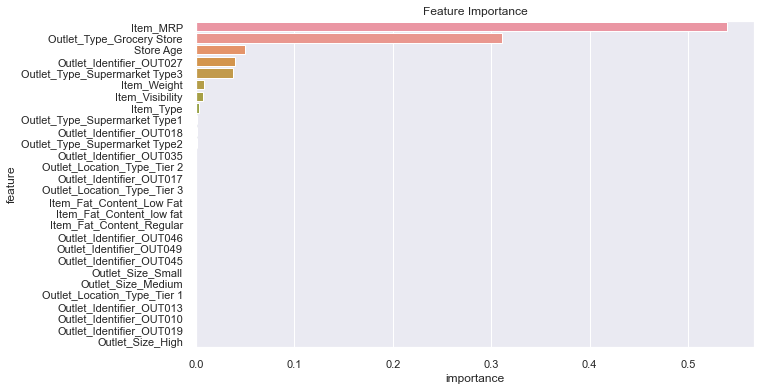

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rfmodelfinal.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df, x='importance', y='feature');

Feature: 0, Score: 12983.53278
Feature: 1, Score: 13571.67481
Feature: 2, Score: 4951.33896
Feature: 3, Score: 2195537.74615
Feature: 4, Score: 94778.30830
Feature: 5, Score: 190.29645
Feature: 6, Score: 101.18064
Feature: 7, Score: 157.68114
Feature: 8, Score: 10.41089
Feature: 9, Score: 10.68233
Feature: 10, Score: 505.26985
Feature: 11, Score: 1207.60309
Feature: 12, Score: 4.96260
Feature: 13, Score: 50619.39332
Feature: 14, Score: 552.61383
Feature: 15, Score: 169.49611
Feature: 16, Score: 184.50552
Feature: 17, Score: 121.50400
Feature: 18, Score: 0.00000
Feature: 19, Score: 16.15873
Feature: 20, Score: 29.40771
Feature: 21, Score: 42.96579
Feature: 22, Score: 341.21706
Feature: 23, Score: 331.30829
Feature: 24, Score: 1262746.66328
Feature: 25, Score: 3774.02474
Feature: 26, Score: 1128.90267
Feature: 27, Score: 47210.46148


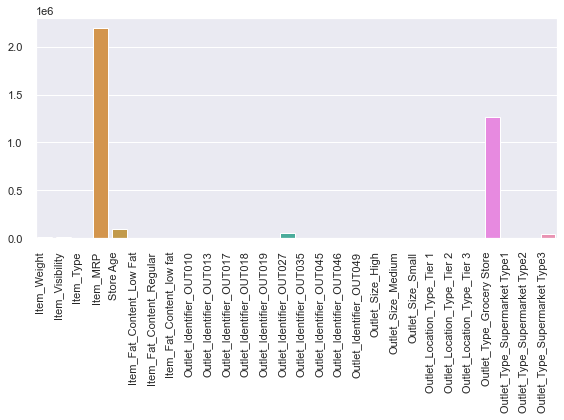

In [46]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rfmodelfinal, X, y, scoring='neg_mean_squared_error')
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8,6))
ax = sns.barplot(y=importance, x=X.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:>

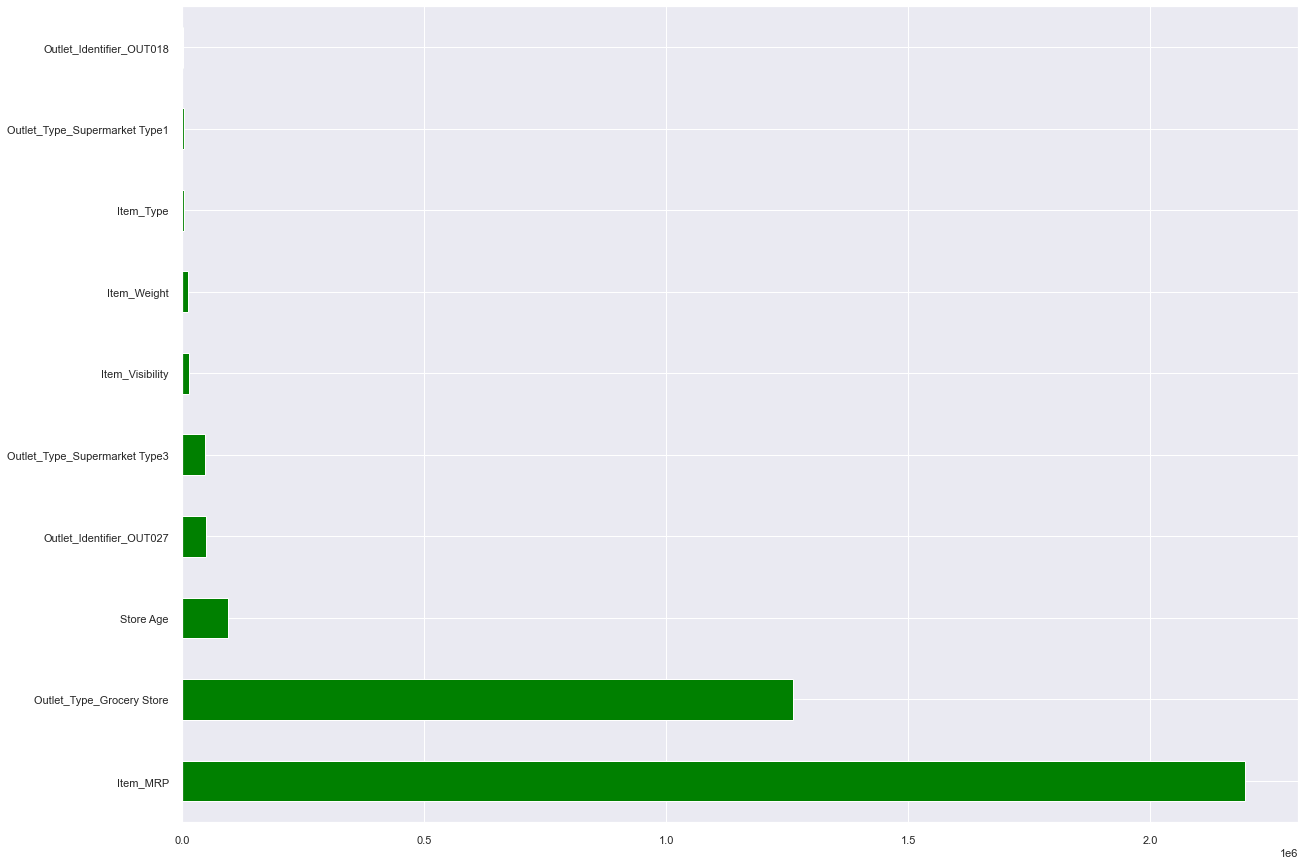

In [47]:
pd.Series(importance, index=X.columns).nlargest(10).plot(kind='barh', color='green')

In [68]:

test_preds = rfmodelfinal.predict(X_test1)



In [69]:
test_preds

array([1645.3882316 , 1367.93752768,  585.15712354, ..., 1966.95154214,
       3839.14158276, 1302.1542631 ])

In [70]:
result=pd.concat([X_test1,pd.DataFrame(test_preds)],axis=1)

In [71]:
result

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Store Age,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,0
0,20.750,0.007565,13,107.8622,23,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1645.388232
1,8.300,0.038428,4,87.3198,15,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1367.937528
2,14.600,0.099575,11,241.7538,24,1,0,0,1,0,...,0,1,0,0,1,1,0,0,0,585.157124
3,7.315,0.015388,13,155.0340,15,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,2467.461270
4,13.600,0.118599,4,234.2300,37,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,6194.337445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5656,10.500,0.013496,13,141.3154,25,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,2158.153876
5657,7.600,0.142991,15,169.1448,13,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,2690.648284
5658,10.000,0.073529,8,118.7440,20,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1966.951542
5659,15.300,0.000000,3,214.6218,15,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,3839.141583


In [53]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7667 entries, 7590 to 7871
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    7667 non-null   float64
 1   Item_Visibility                7667 non-null   float64
 2   Item_Type                      7667 non-null   int32  
 3   Item_MRP                       7667 non-null   float64
 4   Store Age                      7667 non-null   int64  
 5   Item_Fat_Content_Low Fat       7667 non-null   uint8  
 6   Item_Fat_Content_Regular       7667 non-null   uint8  
 7   Item_Fat_Content_low fat       7667 non-null   uint8  
 8   Outlet_Identifier_OUT010       7667 non-null   uint8  
 9   Outlet_Identifier_OUT013       7667 non-null   uint8  
 10  Outlet_Identifier_OUT017       7667 non-null   uint8  
 11  Outlet_Identifier_OUT018       7667 non-null   uint8  
 12  Outlet_Identifier_OUT019       7667 non-null 

In [73]:
result.to_csv("SalesoftheItems.csv")

In [67]:
X_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5661 entries, 0 to 5660
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Item_Weight                    5661 non-null   float64
 1   Item_Visibility                5661 non-null   float64
 2   Item_Type                      5661 non-null   int32  
 3   Item_MRP                       5661 non-null   float64
 4   Store Age                      5661 non-null   int64  
 5   Item_Fat_Content_Low Fat       5661 non-null   uint8  
 6   Item_Fat_Content_Regular       5661 non-null   uint8  
 7   Item_Fat_Content_low fat       5661 non-null   uint8  
 8   Outlet_Identifier_OUT010       5661 non-null   uint8  
 9   Outlet_Identifier_OUT013       5661 non-null   uint8  
 10  Outlet_Identifier_OUT017       5661 non-null   uint8  
 11  Outlet_Identifier_OUT018       5661 non-null   uint8  
 12  Outlet_Identifier_OUT019       5661 non-null   u